In [0]:
import os

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded =files.upload()

Saving BigMaxIndex.xlsx to BigMaxIndex.xlsx


In [0]:
import io
df =pd.read_excel(io.BytesIO(uploaded['BigMaxIndex.xlsx']))

In [0]:
df.head()

,Country,Big Mac Price in USD,Hourly Wages in USD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


In [0]:
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
df.shape

(27, 3)

stochastic gradient descent y =mx+c output =variable1*placeholder+variable2

In [0]:
x=tf.placeholder(dtype=tf.float32,shape=None,name='input')

In [0]:
m=tf.Variable(initial_value=0,dtype=tf.float32)
c=tf.Variable(initial_value=0,dtype=tf.float32)

In [0]:
layer1 =tf.multiply(x,m,name='layer1')
output =tf.add(layer1,c,name='output')

calculating sse and back propagation sum of squared errors

In [0]:
y_actual =tf.placeholder(dtype=tf.float32,shape=None,name='actual')

In [0]:
sse =tf.reduce_sum(tf.square(tf.subtract(output,y_actual)))

In [0]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [0]:
train =optimizer.minimize(sse)

In [0]:
x_input =df.iloc[:,1:2].values
y_input =df.iloc[:,2:3].values

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [0]:
mmx =MinMaxScaler()
mmy =MinMaxScaler()

In [0]:
x_norm=mmx.fit_transform(x_input)

In [0]:
y_norm =mmy.fit_transform(y_input)

In [0]:
x_norm,y_norm

(array([[0.06470588],
        [0.19411765],
        [0.08235294],
        [0.57058824],
        [0.29705882],
        [0.22352941],
        [0.        ],
        [0.20588235],
        [0.85      ],
        [0.52352941],
        [0.29117647],
        [0.18823529],
        [0.28823529],
        [0.03823529],
        [0.28823529],
        [0.3       ],
        [0.30588235],
        [0.12352941],
        [0.03529412],
        [0.19117647],
        [0.19117647],
        [0.44117647],
        [0.70588235],
        [1.        ],
        [0.05294118],
        [0.33529412],
        [0.44411765]]), array([[0.03012048],
        [0.39759036],
        [0.05120482],
        [0.6686747 ],
        [0.49096386],
        [0.09638554],
        [0.07228916],
        [0.07228916],
        [0.79518072],
        [0.50542169],
        [0.10843373],
        [0.01807229],
        [0.74698795],
        [0.11445783],
        [0.04819277],
        [0.3373494 ],
        [0.        ],
        [0.06024096],
        [

In [0]:
def batching(high,batchsize):
  return np.random.randint(0,high,batchsize)

In [0]:
np.random.randint(0,27,5)

array([ 5, 23, 18, 26, 24])

In [0]:
print(x_norm[batching(27,5)])

[[0.3       ]
 [0.29705882]
 [0.85      ]
 [0.85      ]
 [0.08235294]]


Epoch: 0,loss:4.21,intercept:0.02,slope:0.00


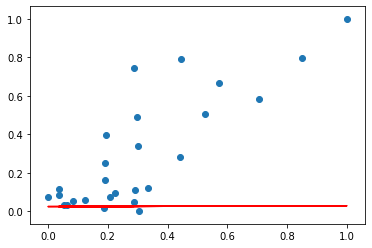

Epoch: 100,loss:0.98,intercept:0.11,slope:0.62


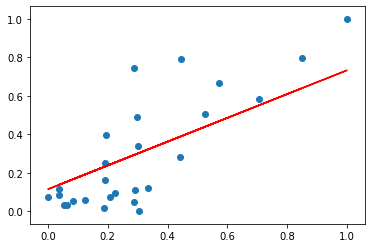

Epoch: 200,loss:0.82,intercept:0.04,slope:0.80


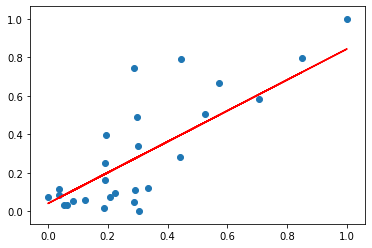

Epoch: 300,loss:0.78,intercept:0.02,slope:0.91


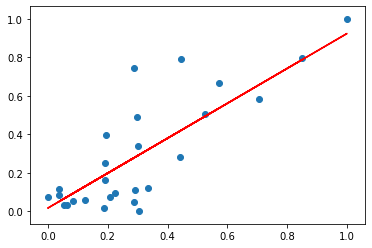

Epoch: 400,loss:0.79,intercept:-0.02,slope:0.94


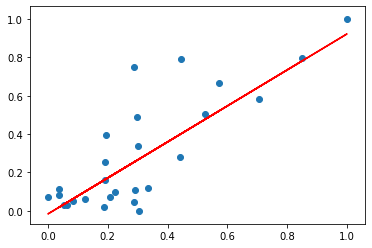

Epoch: 500,loss:0.78,intercept:0.01,slope:0.97


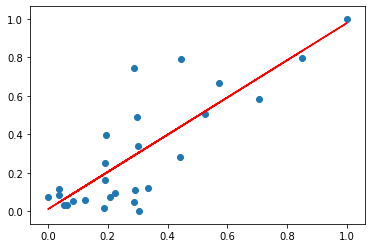

Epoch: 600,loss:0.78,intercept:-0.01,slope:0.96


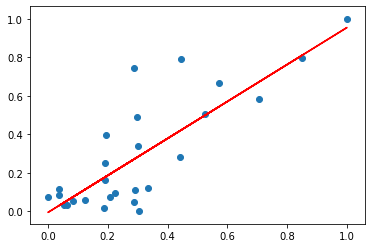

Epoch: 700,loss:0.80,intercept:-0.03,slope:0.97


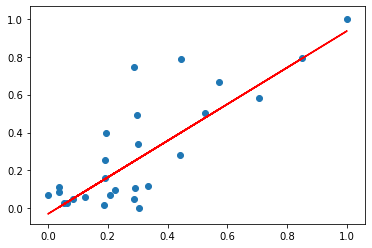

Epoch: 800,loss:0.78,intercept:-0.00,slope:0.97


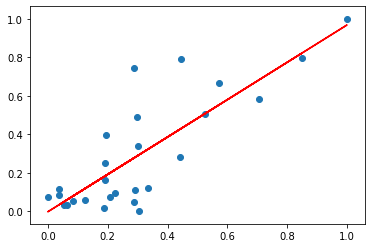

Epoch: 900,loss:0.78,intercept:0.00,slope:0.98


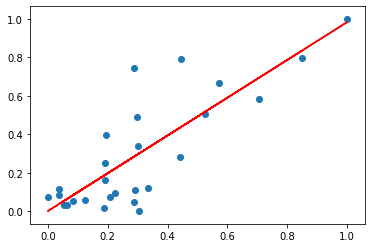

Epoch: 1000,loss:0.78,intercept:-0.01,slope:0.98


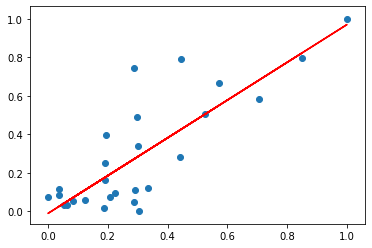

Epoch: 1100,loss:0.78,intercept:0.00,slope:0.97


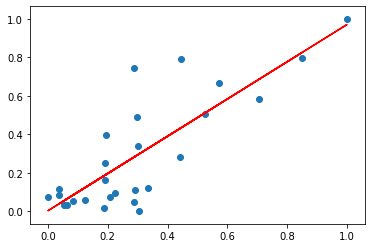

Epoch: 1200,loss:0.78,intercept:0.01,slope:0.97


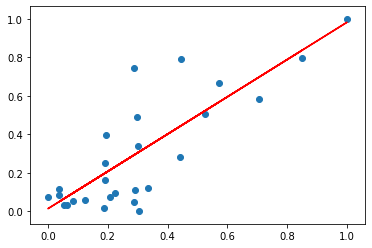

Epoch: 1300,loss:0.78,intercept:-0.01,slope:0.95


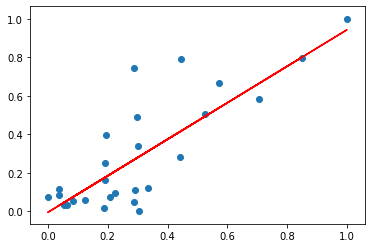

Epoch: 1400,loss:0.80,intercept:-0.03,slope:0.96


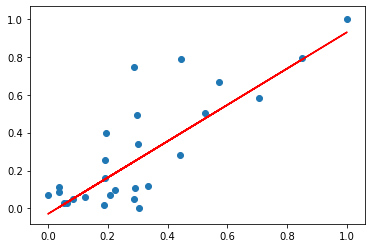

Epoch: 1500,loss:0.79,intercept:0.02,slope:0.97


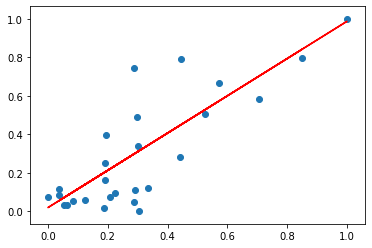

In [0]:
init =tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  writer =tf.summary.FileWriter('./linearsgd',graph=sess.graph)
  epochs =1501
  for i in range(epochs):
    ind =batching(27,8)
    sess.run(train,feed_dict={x:x_norm[ind],y_actual:y_norm[ind]})
    if i%100 ==0:

      intercept = sess.run(c,feed_dict={x:x_norm,y_actual:y_norm})
      slope = sess.run(m,feed_dict={x:x_norm,y_actual:y_norm})
      loss = sess.run(sse,feed_dict={x:x_norm,y_actual:y_norm})
      print('Epoch: %s,loss:%0.2f,intercept:%0.2f,slope:%0.2f'%(i,loss,intercept,slope))
      y_hat =intercept+slope*x_norm
      plt.scatter(x_norm,y_norm)
      plt.plot(x_norm,y_hat,'r')
      plt.show()
  writer.close()